In [4]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# 配列確認
# 学習に6万データ、検証用に1万データが読み込まれていることが確認できる
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


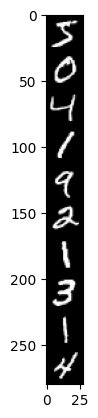

In [6]:
# 画像の表示確認
# MNISTの手書き文字画像(28x28ピクセル)とはどのようなデータかについて
# 最初の10文字だけ表示確認してみる
import matplotlib.pyplot as plt

plt.imshow(x_train[:10].reshape((280,28)))
plt.gray()

In [7]:
# 学習用に整形(入力部)
# 今回は画像を2次元ではなく、28x28ピクセルを784x1の1次元配列として入力してみる
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 学習用に正規化(入力部)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)


x_train: (60000, 784)
x_test: (10000, 784)


In [8]:
#学習用に整形(出力部)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

# クラス分類モデルの場合、出力(教師ラベル)をOne-Hot表現に変換
num_classes=10  #0-9までの数値の認識だから10クラス
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)
print("y_train_one_hot:",y_train_one_hot.shape)
print("y_test_one_hot:",y_test_one_hot.shape)

y_train: (60000,)
y_test: (10000,)
y_train_one_hot: (60000, 10)
y_test_one_hot: (10000, 10)


In [9]:
# モデル生成
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# 784x1の入力、10次元の出力を持つ3層程度のモデルを作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))   # 出力層。排他クラス分類モデルのため、出力層の活性化関数はsoftmaxを採用。softmax関数は各出力の和が1.0になるので、出力を確率と見なせる。

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#学習実行
batch_size = 128  # バッチサイズ(学習実施のたびに6万データからランダムに128個のデータをサンプリングするよう指定)
epochs = 10       # エポック(学習サイクル数。サイクルごとに検証データを利用した精度評価が行える)

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_one_hot))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8113 - loss: 0.5995 - val_accuracy: 0.9592 - val_loss: 0.1267
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9472 - loss: 0.1719 - val_accuracy: 0.9696 - val_loss: 0.0927
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9613 - loss: 0.1240 - val_accuracy: 0.9739 - val_loss: 0.0825
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9673 - loss: 0.1088 - val_accuracy: 0.9779 - val_loss: 0.0716
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9715 - loss: 0.0901 - val_accuracy: 0.9788 - val_loss: 0.0708
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9737 - loss: 0.0865 - val_accuracy: 0.9801 - val_loss: 0.0697
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9746 - loss: 0.0804 - val_accuracy: 0.9797 - val_loss: 0.0660
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9786 - loss: 0.0684 - 

In [11]:
# モデル評価(検証データを利用してモデルの精度を確認する)
score = model.evaluate(x_test, y_test_one_hot, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06521651893854141
Test accuracy: 0.9815000295639038
